In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Load and preprocess the data

In [3]:
data = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/13/Glass.csv')

In [4]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
#Drop duplicates from the dataset
data = data.drop_duplicates()
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


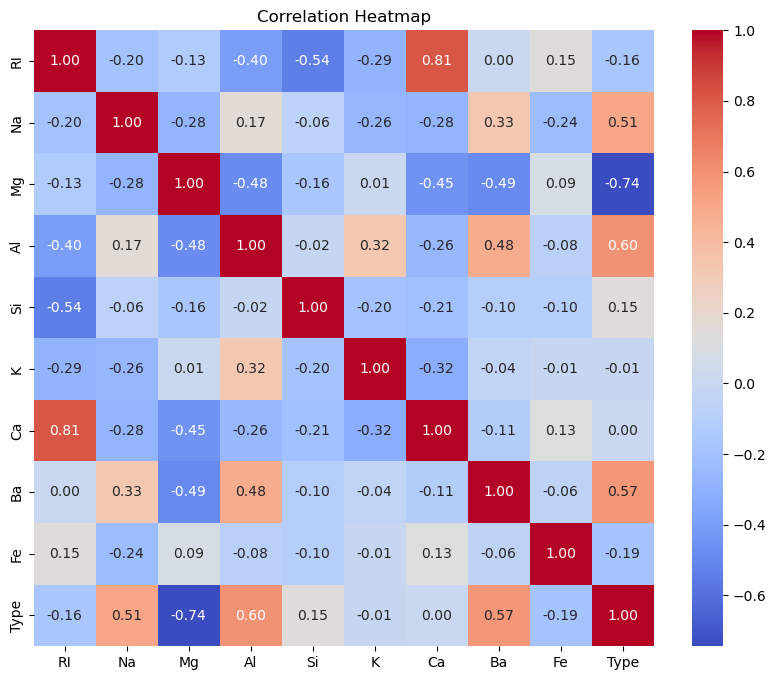

In [10]:
#Create a heatmap to visualize the correlation between features
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### Ca and RI are highly correlated, this means using only RI is enough.


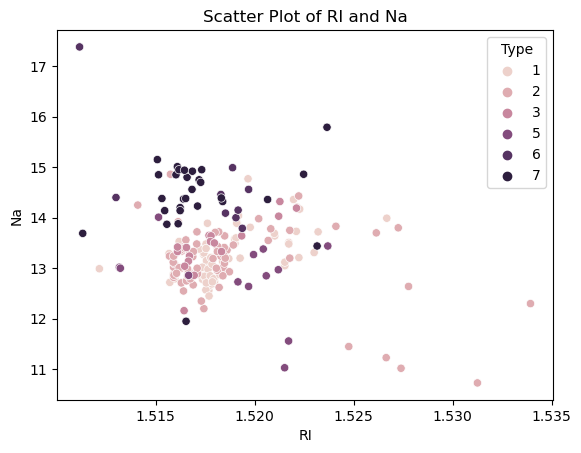

In [11]:
#Create a scatter plot of two features
sns.scatterplot(x='RI', y='Na', hue='Type', data=data)
plt.title("Scatter Plot of RI and Na")
plt.show()

##### The pairwise plot allows us to visualize the relationships between all the features in the dataset.
##### we should consider the entire dataset and the pairwise relationships among features.

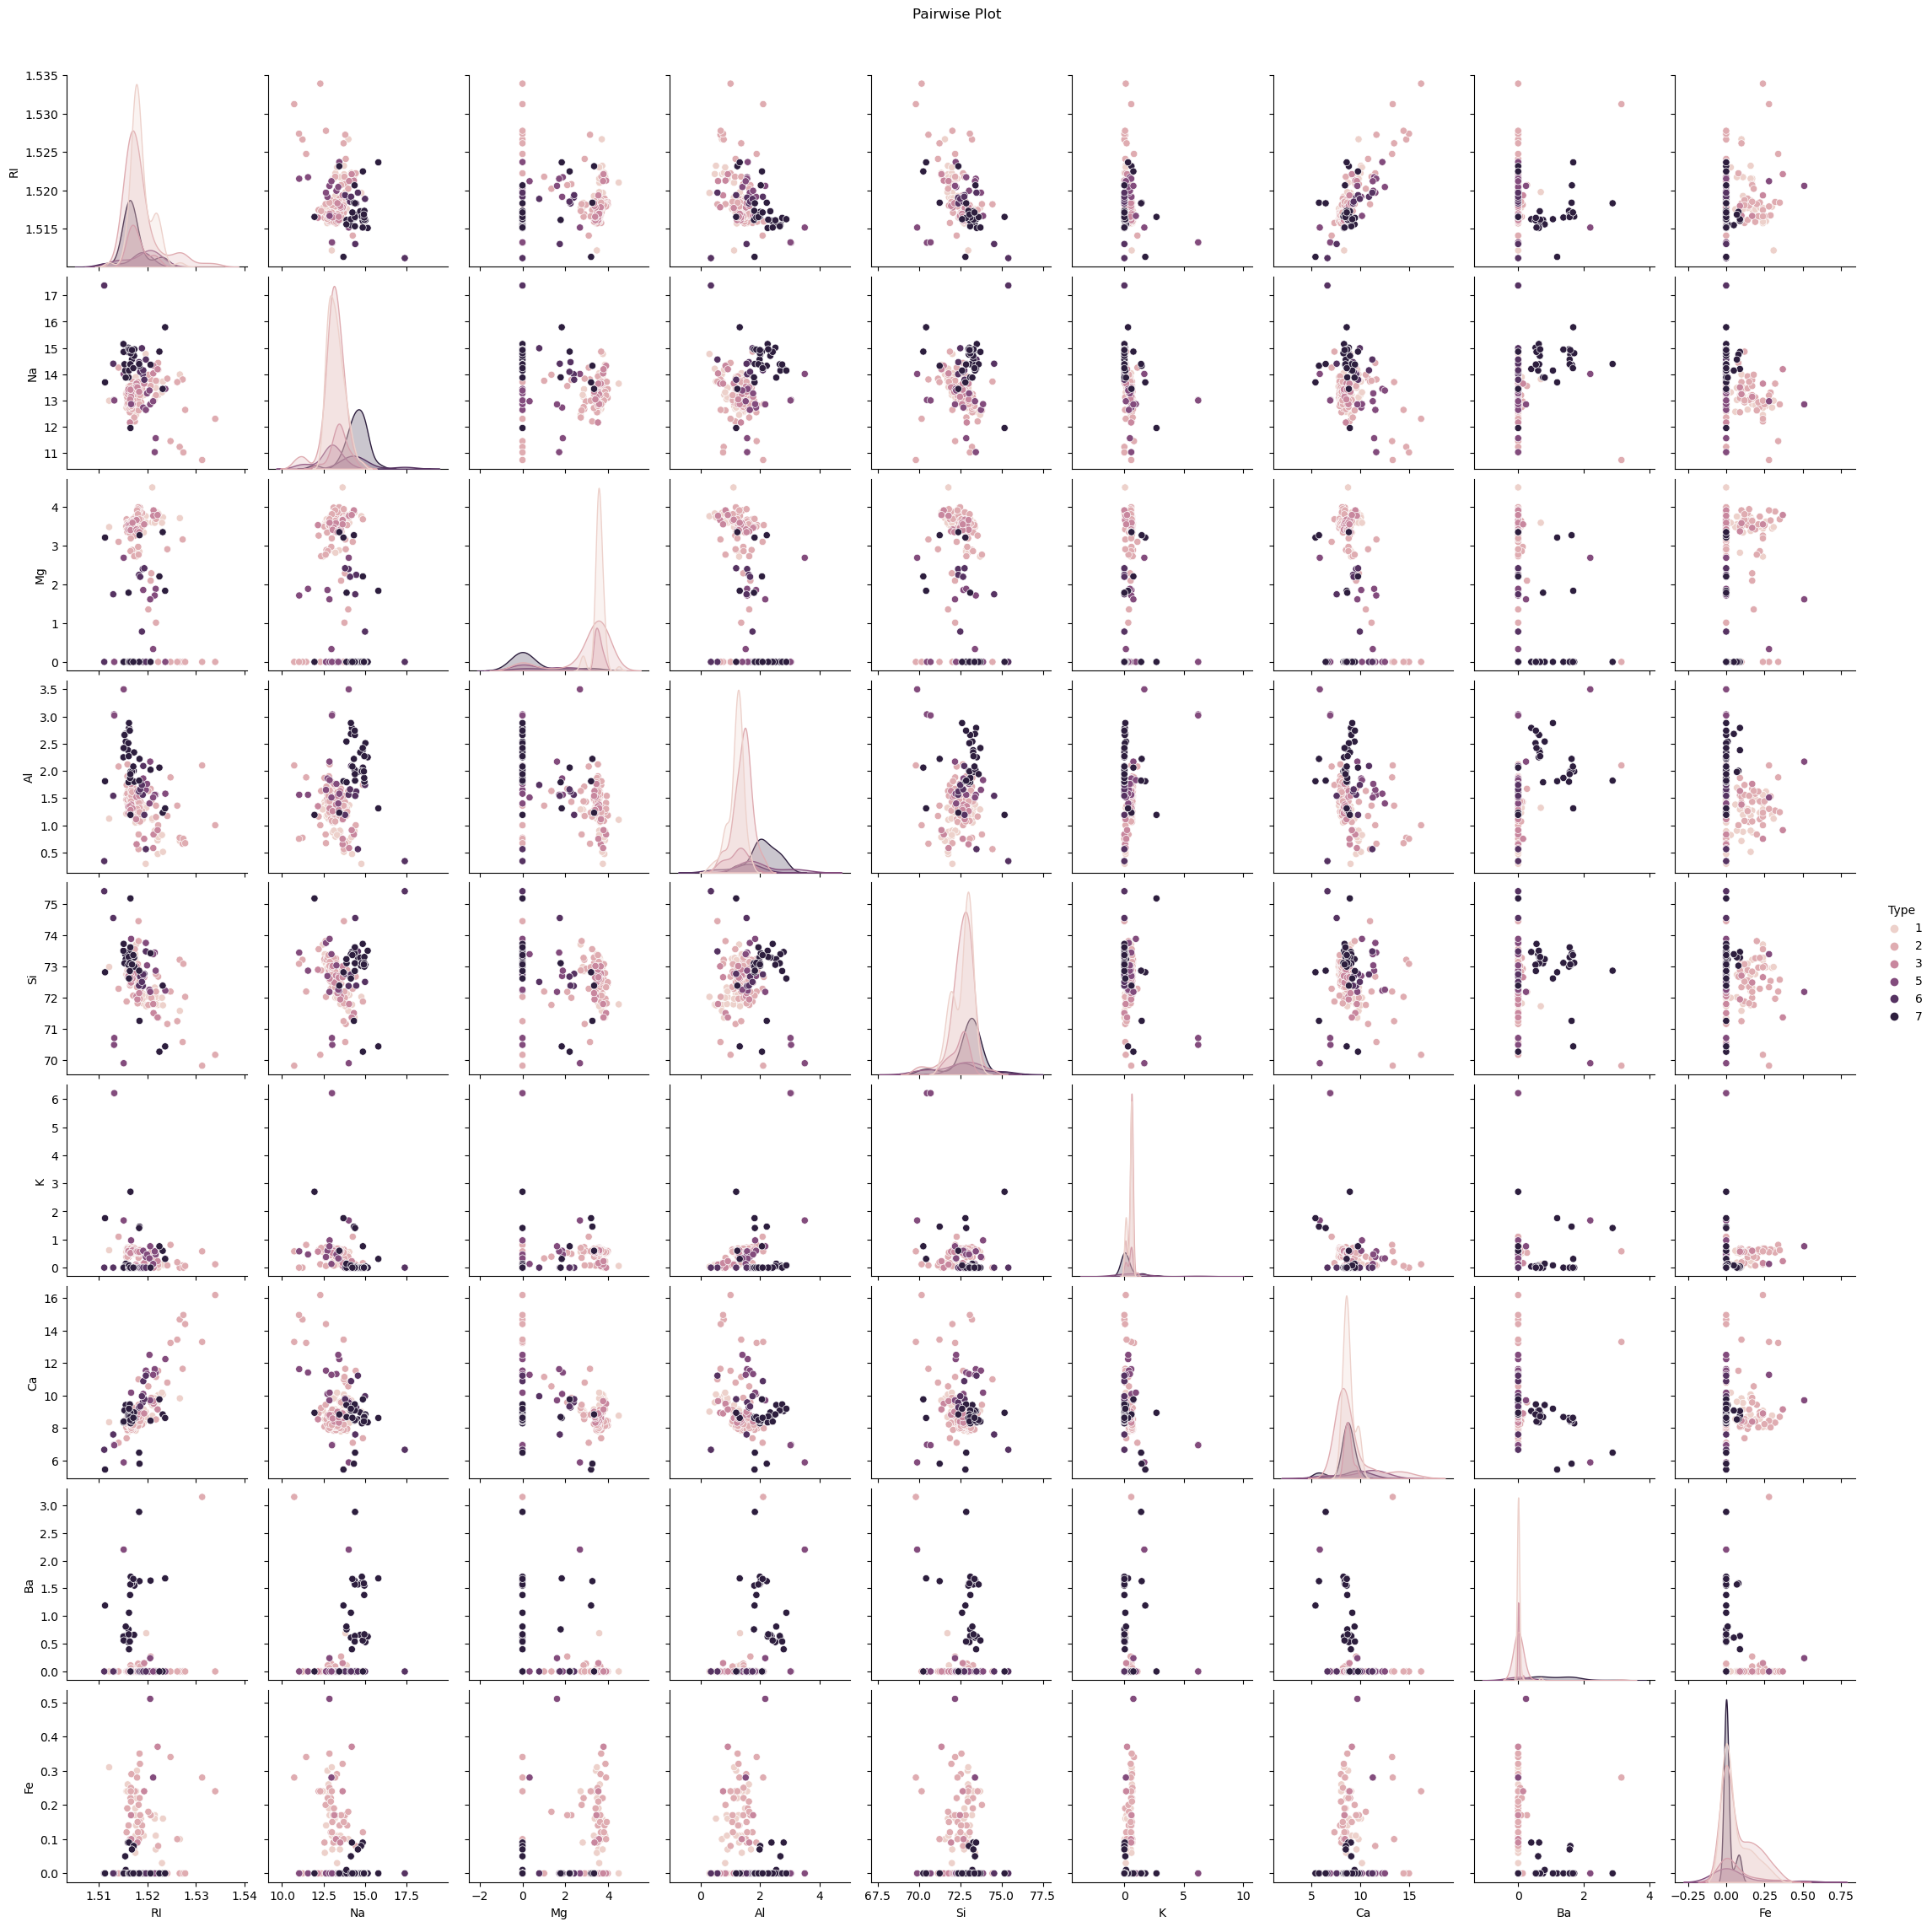

In [12]:
#Create a pairwise plot to visualize the relationships between all features
sns.pairplot(data, hue='Type', diag_kind='kde')
plt.suptitle("Pairwise Plot", y=1.02)
plt.show()

##### the data doesn't appear to follow a linear pattern, K-Nearest Neighbors (KNN) can be a suitable algorithm to classify the glass types based on their nearest neighbors.

# Feature Scaling and KNN

In [13]:
# Separate features (X) and target (y)
X = data.drop("Type", axis=1)
y = data["Type"]

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
#Train the KNN classifier on the training data
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of 'n_neighbors' as needed
knn_classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [18]:
#Evaluate the model on the testing data
y_pred = knn_classifier.predict(X_test_scaled)


In [19]:
# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6976744186046512
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.90      0.75        10
           2       0.69      0.73      0.71        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       0.78      0.78      0.78         9

    accuracy                           0.70        43
   macro avg       0.60      0.57      0.57        43
weighted avg       0.66      0.70      0.67        43



/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

##### The overall accuracy of the model is approximately 69.77%, which means it correctly classified 69.77% of the glass types in the test set.

##### Precision represents the ability of the classifier not to label a sample as positive when it is negative.
##### Recall is the ability of the classifier to find all the positive samples.
##### class 3, have a low F1-score(harmonic mean of precision and recall) , indicating that the classifier struggles to correctly identify those classes.

##### The classification report shows that some classes have very few samples (e.g., class 3, 5, and 6). This class imbalance can impact the performance of the model, especially for classes with limited data.

# Grid Search for Algorithm Tuning

In [27]:
#Perform Grid Search to find the best value for n_neighbors

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}  # Try values from 1 to 20
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5 , return_train_score=True)  # 5-fold cross-validation
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, return_train_score=True)

In [28]:
#Get the best hyperparameters and evaluate the model on the test set
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_knn_classifier = grid_search.best_estimator_


In [29]:
y_pred = best_knn_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [30]:
print("Best n_neighbors:", best_n_neighbors)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best n_neighbors: 1
Accuracy: 0.7209302325581395
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.80      0.67        10
           2       0.71      0.67      0.69        15
           3       0.00      0.00      0.00         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.72        43
   macro avg       0.67      0.67      0.66        43
weighted avg       0.71      0.72      0.71        43



##### Best n_neighbors: 1 - model classifies each data point based solely on its closest neighbor, which is the nearest data point.

##### The accuracy of the model on the test set is approximately 72.09%. This shows that the KNN classifier with one nearest neighbor achieved 72.09% accuracy in classifying the glass types.

##### class 3, have an F1-score of 0, indicating that the classifier struggled to identify those classes.

##### The macro average F1-score and accuracy are around 67%, while the weighted average F1-score and accuracy are around 71%. 
##### The macro average treats all classes equally, while the weighted average considers class imbalance.

# Visualizing the CV results

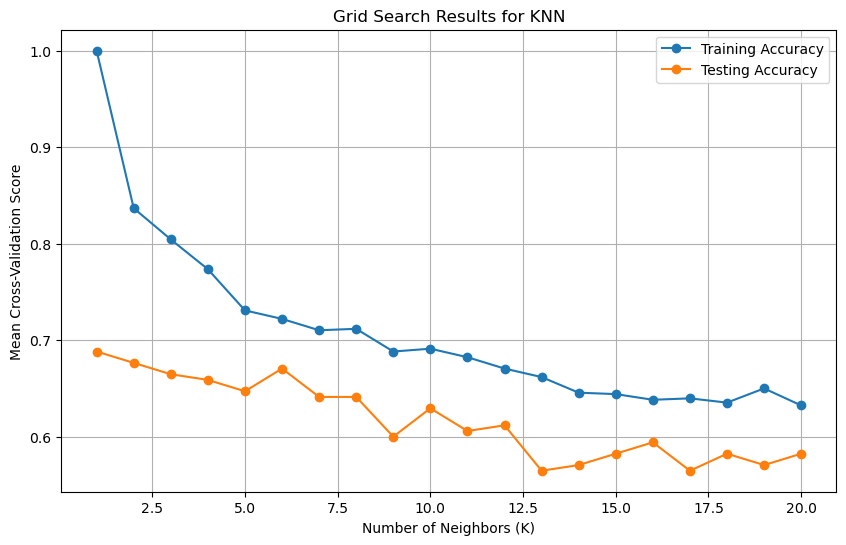

In [31]:
#Visualize the CV results for both training and testing accuracy
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_train_score'], marker='o', label='Training Accuracy')
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'], marker='o', label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Grid Search Results for KNN')
plt.legend()
plt.grid()
plt.show()